Mean Squared Error: 0.71
R-squared: 0.27


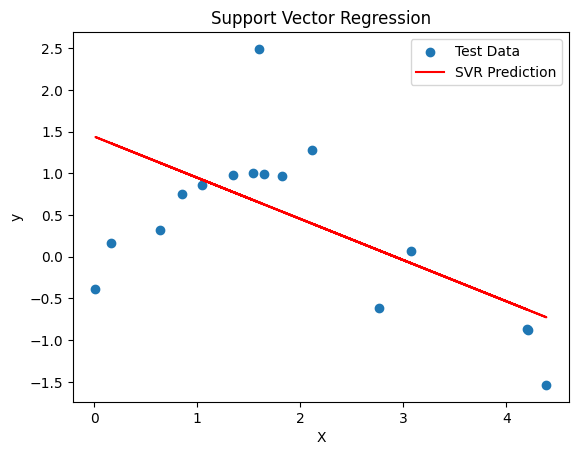

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate some sample data
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to the target values
y[::5] += 3 * (0.5 - np.random.rand(16))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Regression model
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the data and the SVR predictions
plt.scatter(X_test, y_test, label="Test Data")
plt.plot(X_test, y_pred, color="red", label="SVR Prediction")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Support Vector Regression")
plt.show()


In [ ]:
import pandas as pd
data = pd.read_csv('/content/homeprices.csv')
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
data.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [ ]:
data['bedrooms'].fillna(data['bedrooms'].median(),inplace=True)

In [ ]:
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


In [ ]:
params={'epsilon':[0.1,0.5,1,1.5,2]}
model=SVR()
grid_search=GridSearchCV(model,params,cv=5)
x=data.drop(['price'],axis=1)
y=data['price']
grid_search.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'epsilon': [0.1, 0.5, 1, 1.5, 2]})

In [ ]:
grid_search.best_params_

{'epsilon': 0.1}

In [ ]:
grid_search.best_score_

nan